# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import h5py

In [ ]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

# Part A

A communications equipment manufacturing company has a product that is responsible for emitting informative signals. \
The company wants to build a machine learning model that can help the company predict the equipment's siignal quality using various parameters.

**Objective**
To build a classifier that can use the given parameters to determine the signal strength or quality.

## Reading Data

In [ ]:
signals = pd.read_csv("Data/NN Project Data - Signal.csv")

In [ ]:
signals.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
signals.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Checking missing value

In [ ]:
signals.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


There are no missing value in the data

## Checking presence of duplicate Records

In [ ]:
signals[signals.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
# Dropping the duplicated data
signals.drop_duplicates(inplace=True)

## Data Analysis

### **Target Variable**

In [ ]:
def plot_countplot(col_name, data=signals, labels=None, rotation=0, hue=None, perc=False):
  """Function to plot a bar chart for categorical variables
  col_name: Name of column in DataFrame
  data: DataFrame to be passed, (default:data)
  labels: List of labels in the axis
  rotation: Rotation of the labels
  hue: Column name by which the bar chart will be demarcated
  perc: To show percentage on the barchart
  """

  counts = data[col_name].value_counts().sort_index()
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue);
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name);
    for i,count_ in enumerate(counts.tolist()):
      if perc==True:
        count_plot.annotate(f"{str(round(count_/len(data)*100, 2))}%", xy=(i,count_), horizontalalignment="center");
      else:
        count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation);
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);

def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None, data=signals):
  """ Function to plot Histogram/Countplot and Boxplot for numerical data
  col_name: Name of the column
  histplot: Whether to plot histogram or not (default: False, if True, countplot is plotted)
  hue: Column name by which the bar chart will be demarcated

  returns: Plot
  """

  counts = data[col_name].value_counts().sort_index().tolist()
  fig, axes = plt.subplots(2,1,figsize=(15,10));
  if histplot == True:
    count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral");
  else:
    count_plot = sns.countplot(data=data, x=col_name, ax=axes[0], palette="Spectral");
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  axes[0].axvline(x=data[col_name].mean(), color="r");

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral");
  return count_plot

### **Data Analysis of Target Variable**

<Axes: xlabel='Signal_Strength', ylabel='count'>

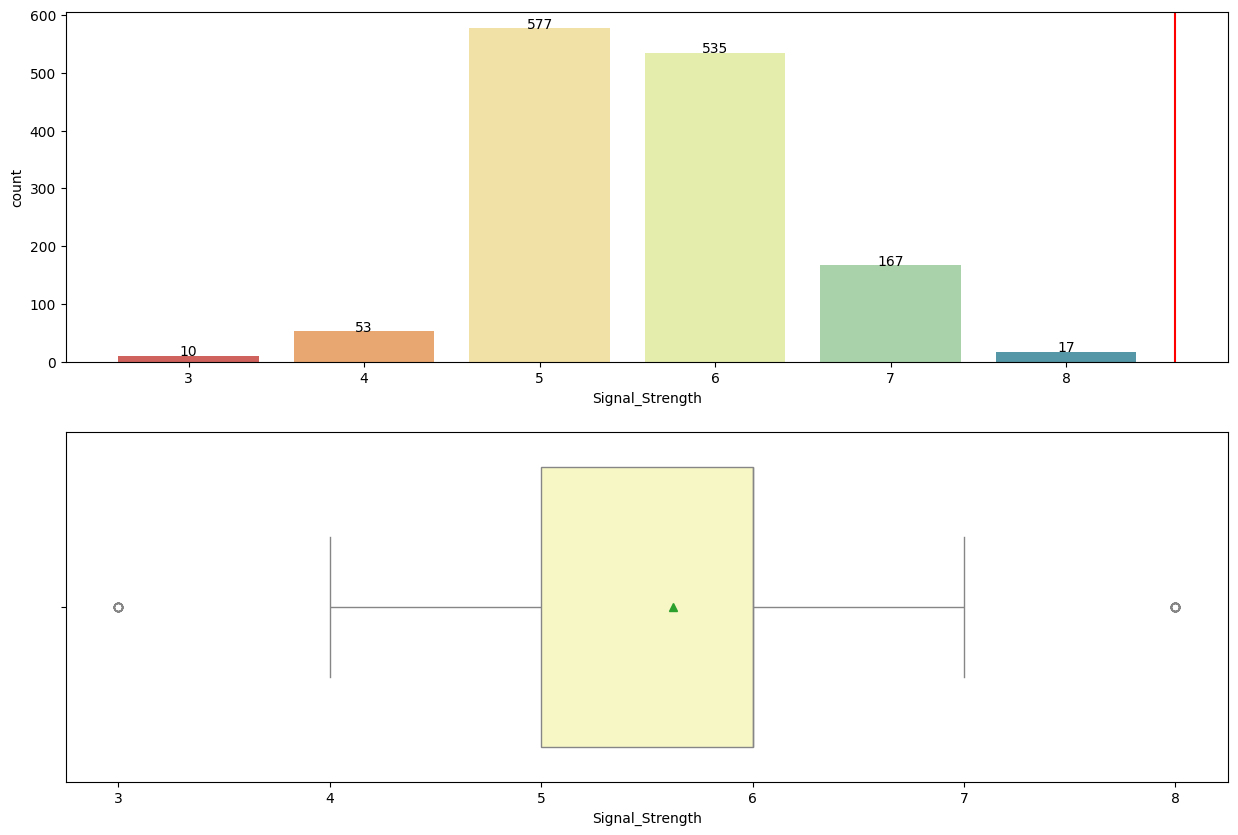

In [ ]:
plot_histogram_countplot_boxplot("Signal_Strength")

As visible from the above graphs, The signal strength ranges majorly between 5, 6 and 7. \
However there are outliers which have strength of 3 and 8. \
25 percentile of the data lies between 4 and 5. \
75 percentile of the data lies between 6 and 7.

### **Pairplot of the data**

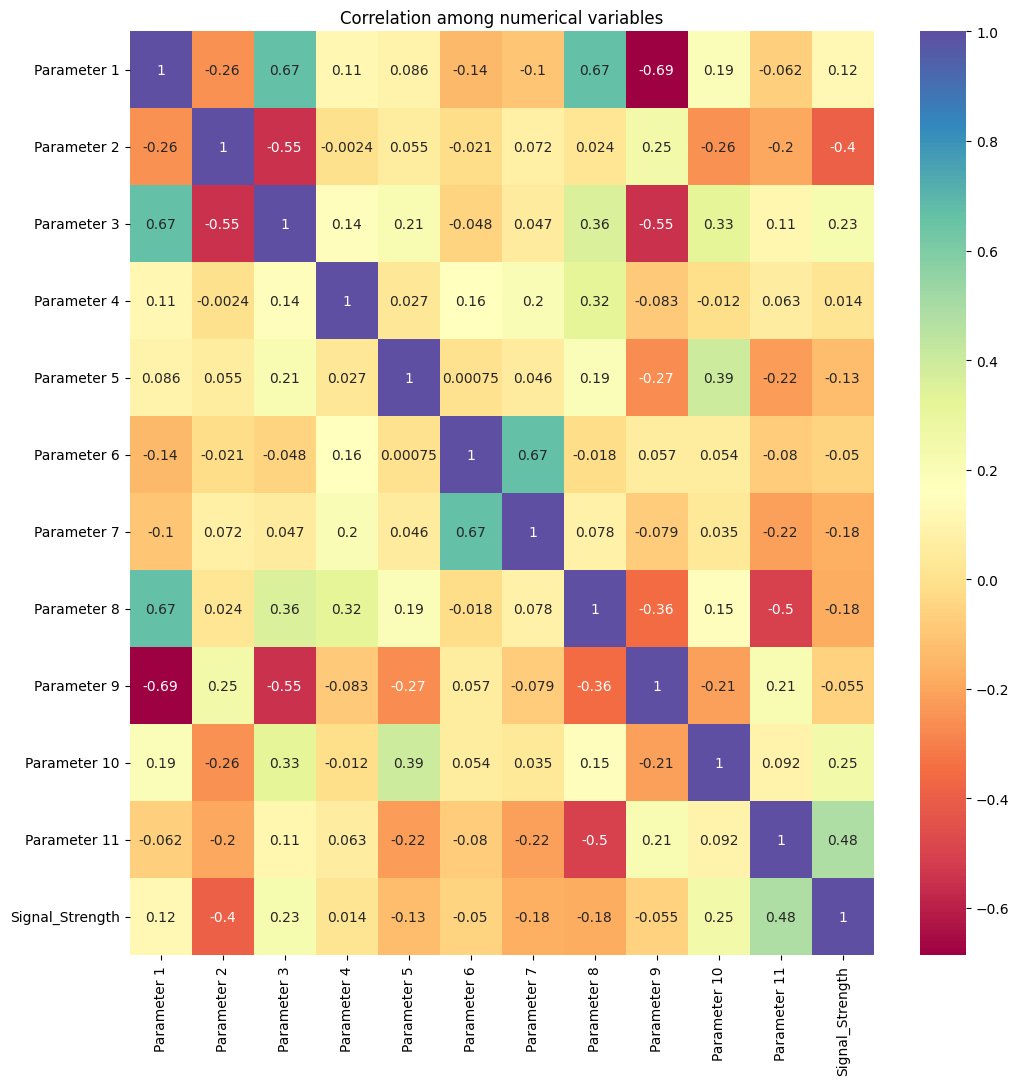

In [ ]:
plt.figure(figsize=(12, 12))
corr_ = sns.heatmap(signals.corr(numeric_only=True),annot=True, cmap="Spectral");
plt.title("Correlation among numerical variables");

In [ ]:
sns.pairplot(signals.iloc[:, :-1])

Output hidden; open in https://colab.research.google.com to view.

The following correlation are significant from the data:\
 **Positive Correlation**:
* Parameter 1 and Parameter 8 are positively correlated
* Parameter 6 and Parameter 7 are positively correlated

 **Negative Correlation**:
* Parameter 9 is negatively correlated with Parameter 1 and Parameter 3.
* Parameter 8 and Parameter 11 are negatively correlated.






## Data Preparation

### **Preparing Features and Target Variable Data**

In [ ]:
x = signals.iloc[:, :-1]
y = signals.iloc[:, -1]

In [ ]:
print(f"Features Shape: {x.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (1359, 11)
Target Shape: (1359,)


### **Preparing Training and Testing Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 7)

In [ ]:
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_train Shape:",y_train.shape)
print("Y_test Shape:",y_test.shape)

X_train Shape: (951, 11)
X_test Shape: (408, 11)
Y_train Shape: (951,)
Y_test Shape: (408,)


In [ ]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
y_train = np.array(y_train) # Since the Signal Strength starts from 3
y_test = np.array(y_test) # Since the Signal Strength starts from 3

In [ ]:
import collections
from collections import Counter
print("y_train:", Counter(y_train))
print("y_test:", Counter(y_test))

y_train: Counter({np.int64(5): 404, np.int64(6): 374, np.int64(7): 117, np.int64(4): 37, np.int64(8): 12, np.int64(3): 7})
y_test: Counter({np.int64(5): 173, np.int64(6): 161, np.int64(7): 50, np.int64(4): 16, np.int64(8): 5, np.int64(3): 3})


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model Training

### **Model 1**

for Model 1, we have the following layers
* 1 input layer with ReLU activation function
* 2 hidden layer with ReLU activation function
* 1 output layer with softmax actvation function

Using Adam Optimizer and Sparse Categorical Crossentropy to compile the model

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape = (11,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
opt = optimizers.Adam(learning_rate= 1e-4)

In [ ]:
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,202 (47.66 KB)

 Trainable params: 12,202 (47.66 KB)

 Non-trainable params: 0 (0.00 B)

#### **Model Training**

In [ ]:
model_log = model.fit(X_train, y_train, batch_size = 100, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.0095 - loss: 2.2815 - val_accuracy: 0.0784 - val_loss: 2.2631
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.1403 - loss: 2.2561 - val_accuracy: 0.3137 - val_loss: 2.2361
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.3636 - loss: 2.2289 - val_accuracy: 0.4240 - val_loss: 2.2133
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.4507 - loss: 2.2051 - val_accuracy: 0.4240 - val_loss: 2.1915
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4248 - loss: 2.1847 - val_accuracy: 0.4240 - val_loss: 2.1691
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4213 - loss: 2.1630 - val_accuracy: 0.4240 - val_loss: 2.1462
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4264 - loss: 2.1400 - val_accuracy: 0.4240 - val_loss: 2.1224
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4231 - loss: 2.1125 - val_accuracy: 0.4240 -

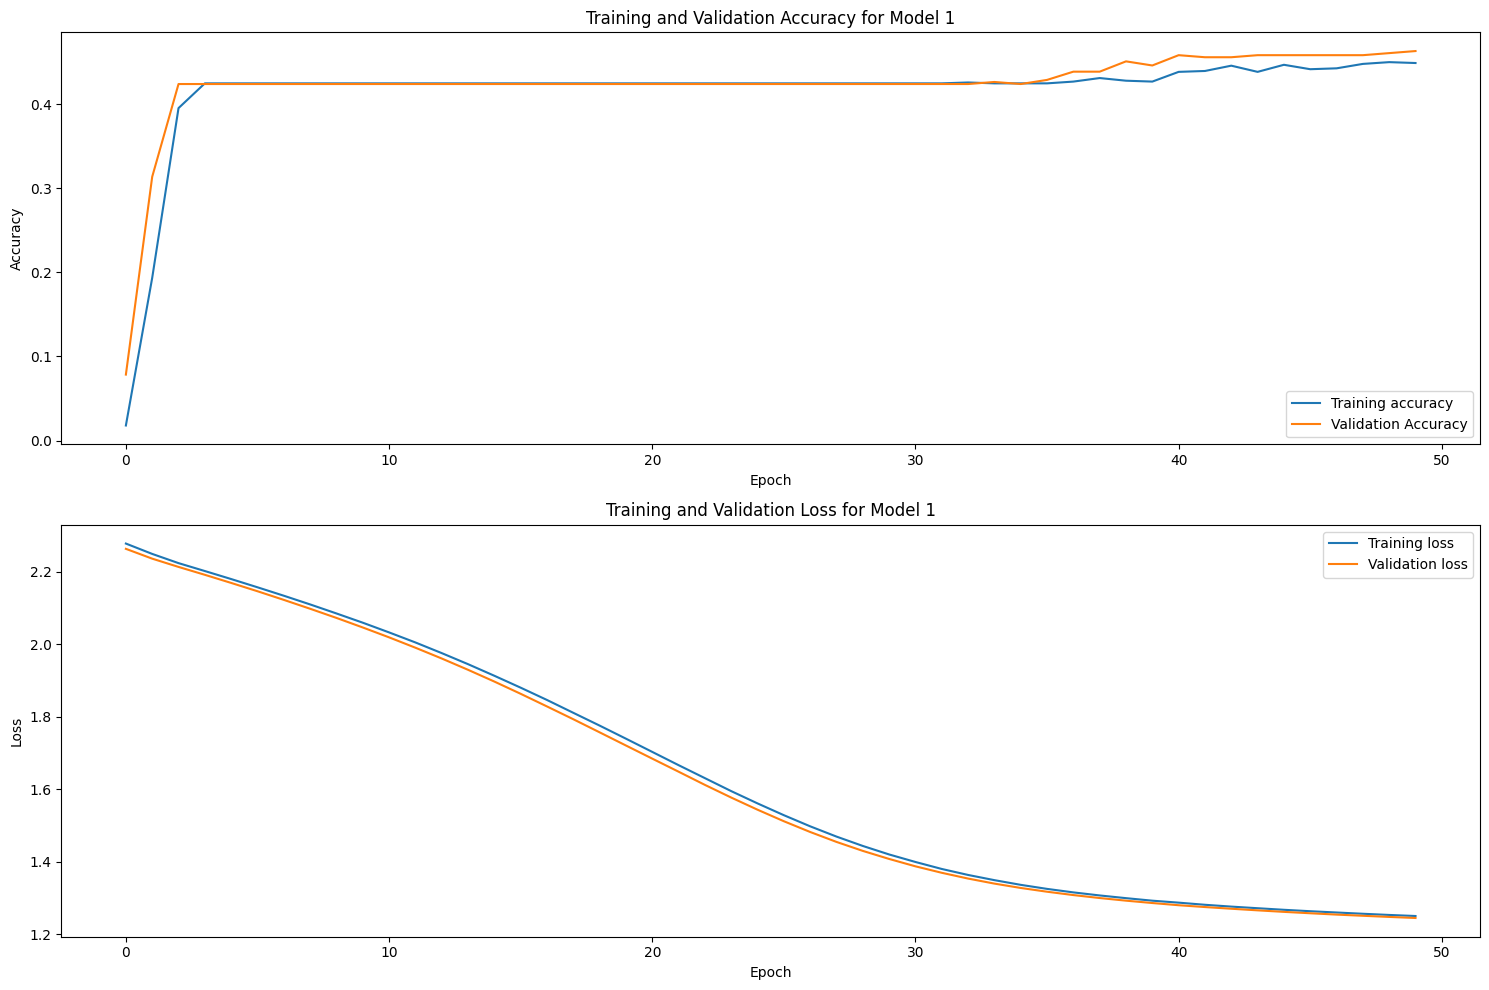

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

sns.lineplot(model_log.history['accuracy'], label='Training accuracy', ax=axes[0])
sns.lineplot(model_log.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])
axes[0].set_title('Training and Validation Accuracy for Model 1')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

sns.lineplot(model_log.history['loss'], label='Training loss', ax=axes[1])
sns.lineplot(model_log.history['val_loss'], label='Validation loss', ax=axes[1])
axes[1].set_title('Training and Validation Loss for Model 1')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

### **Model 2**

Improving Model 1
* by adding BatchNormalization layer to the input layer
* by adding droput layer to input and hidden layers


In [ ]:
model2 = Sequential()
model2.add(Dense(128, input_shape = (11,), activation = 'relu', kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(32, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(10, activation = 'softmax'))

In [ ]:
opt2 = optimizers.Adam(learning_rate= 1e-4)

In [ ]:
model2.compile(optimizer = opt2, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,098 (51.16 KB)

 Trainable params: 12,650 (49.41 KB)

 Non-trainable params: 448 (1.75 KB)

#### **Model Training**

In [ ]:
model2_log = model2.fit(X_train, y_train, batch_size = 100, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.1339 - loss: 2.9710 - val_accuracy: 0.1078 - val_loss: 2.3130
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.1206 - loss: 3.0358 - val_accuracy: 0.1225 - val_loss: 2.2940
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.1543 - loss: 2.9627 - val_accuracy: 0.1225 - val_loss: 2.2800
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.1484 - loss: 2.9436 - val_accuracy: 0.1225 - val_loss: 2.2579
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.1580 - loss: 2.9147 - val_accuracy: 0.1225 - val_loss: 2.2351
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.1548 - loss: 2.7463 - val_accuracy: 0.1225 - val_loss: 2.2112
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.1559 - loss: 2.8812 - val_accuracy: 0.1225 - val_loss: 2.1880
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.1598 - loss: 2.8664 - val_accuracy: 0.

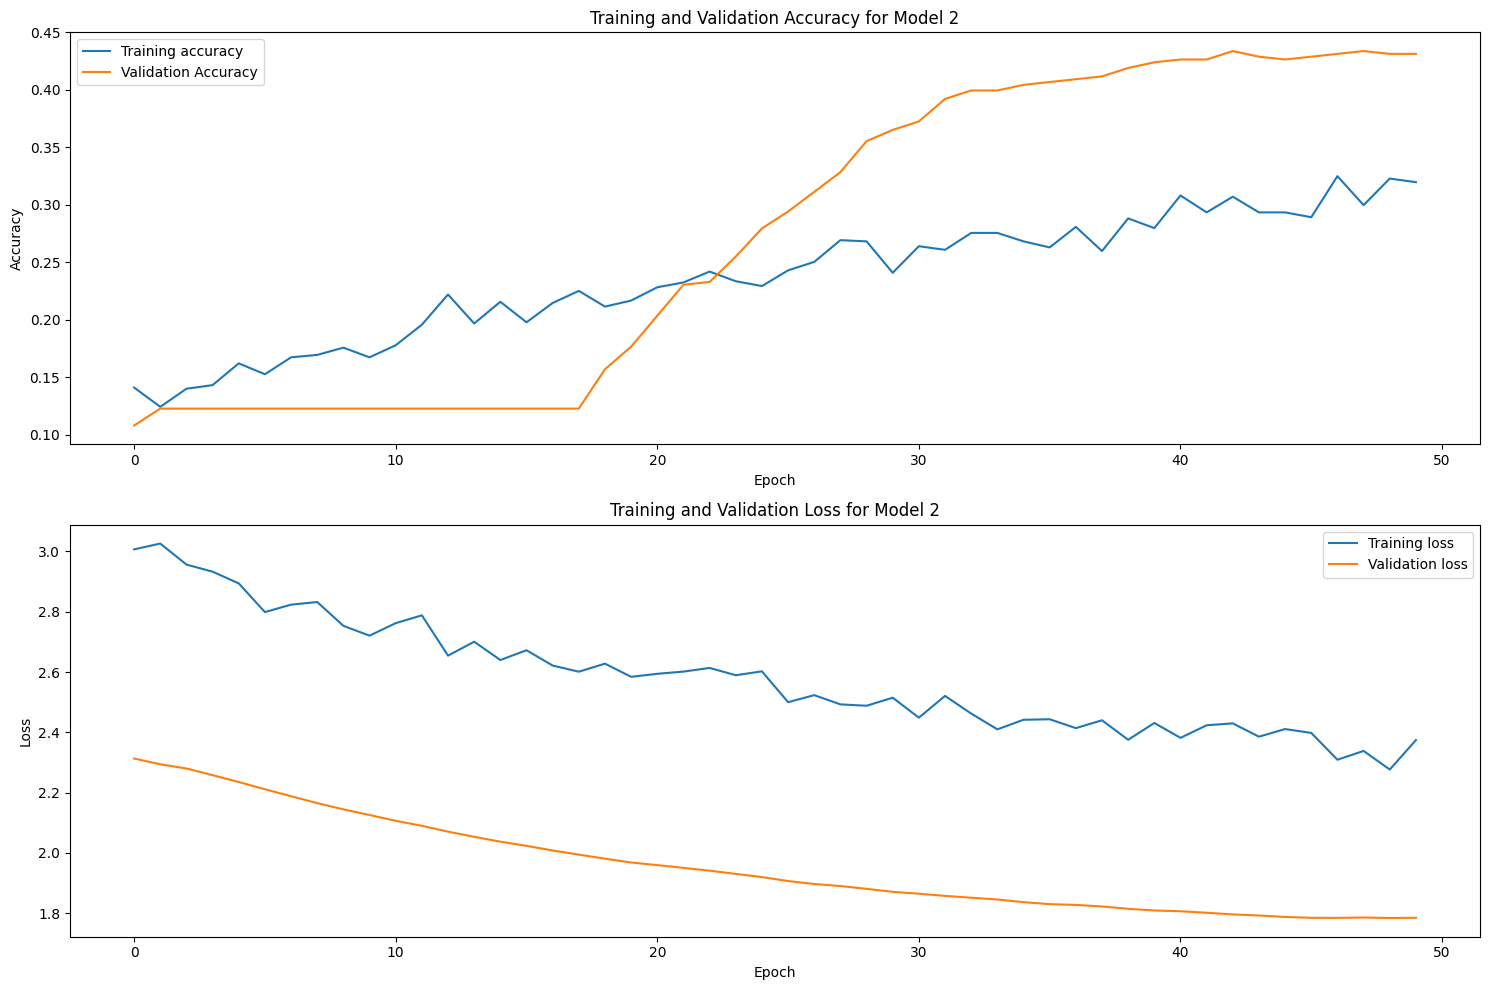

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

sns.lineplot(model2_log.history['accuracy'], label='Training accuracy', ax=axes[0])
sns.lineplot(model2_log.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])
axes[0].set_title('Training and Validation Accuracy for Model 2')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

sns.lineplot(model2_log.history['loss'], label='Training loss', ax=axes[1])
sns.lineplot(model2_log.history['val_loss'], label='Validation loss', ax=axes[1])
axes[1].set_title('Training and Validation Loss for Model 2')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

### Observations

* Model 2 includes L2 regularization in its first dense layer, while Model 1 does not have any regularization.

* Model 2 has batch normalization layers after each dense layer, while Model 1 does not use batch normalization, leading to differences in stability and convergence.

* Both models use dropout with values of 0.5 and 0.2 to reduce overfitting; however, Model 2 additionally incorporates L2 regularization, which helps in generalization.

* Model 1 achieves higher validation accuracy but is likely overfitting due to the absence of batch normalization and regularization techniques.

* Model 1 seems to memorize the pattern rather than generalizing, whereas Model 2 is learning the pattern more effectively. The higher validation accuracy and lower validation loss in Model 1 indicate potential duplicate data in the dataset.

# Part B

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirements on data formatting but comes from a significantly harder, unsolved, real-world problem. SVHN is obtained from house numbers in Google Street View Images

**Objective**
To build a digit classifier on the SVHN (Street View Housing Number) dataset

## Reading Data

In [ ]:
images_data = h5py.File("/content/drive/MyDrive/Great Learning/Projects/Data/Autonomous_Vehicles_SVHN_single_grey1.h5", "r")

## Keys in h5 file

In [ ]:
images_data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
X_train_raw = np.array(images_data["X_train"])
y_train_raw = np.array(images_data["y_train"])

X_val_raw = np.array(images_data["X_val"])
y_val_raw = np.array(images_data["y_val"])

X_test_raw = np.array(images_data["X_test"])
y_test_raw = np.array(images_data["y_test"])

## Splitting of Training, Validation and Test Data

Only using X_train_raw as the dataset to train the model since the entire dataset is very big

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, y_train_raw, test_size = 0.3, stratify=y_train_raw, random_state = 7, shuffle=True)

In [ ]:
print("X_train Shape:",X_train.shape)
print("Y_train Shape:",y_train.shape)
print("\n")
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",y_test.shape)

X_train Shape: (29400, 32, 32)
Y_train Shape: (29400,)


X_test Shape: (12600, 32, 32)
Y_test Shape: (12600,)


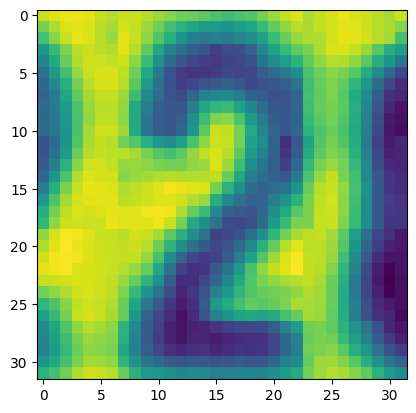

2


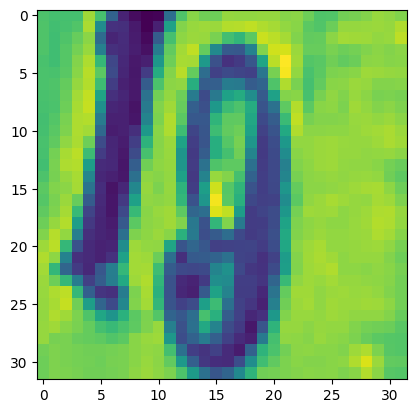

9


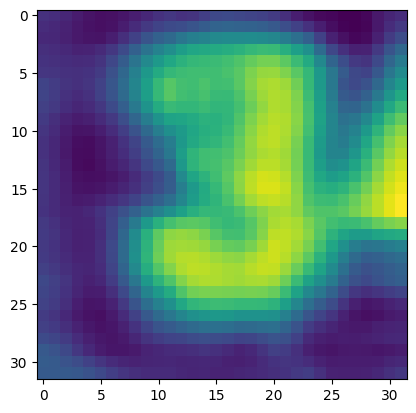

3


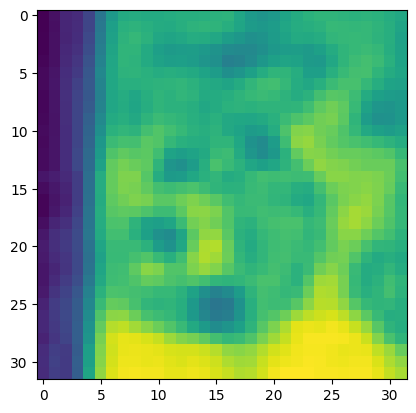

3


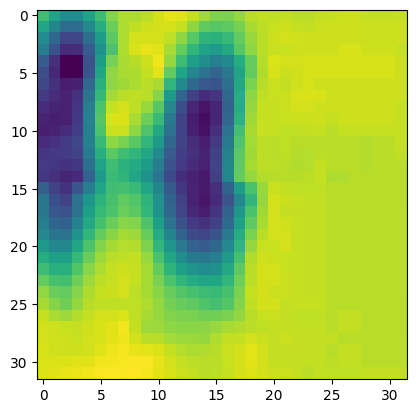

4


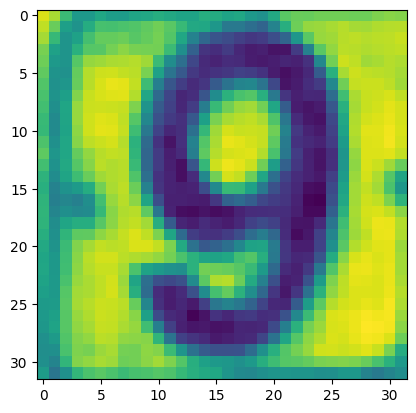

9


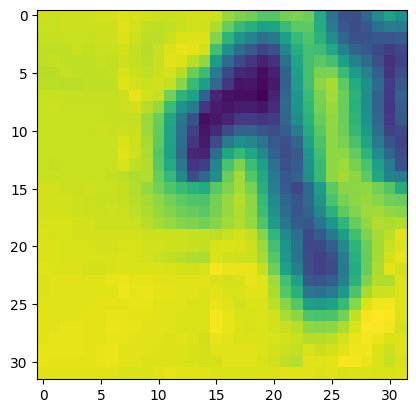

7


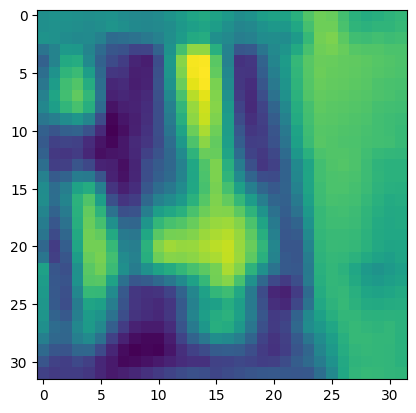

4


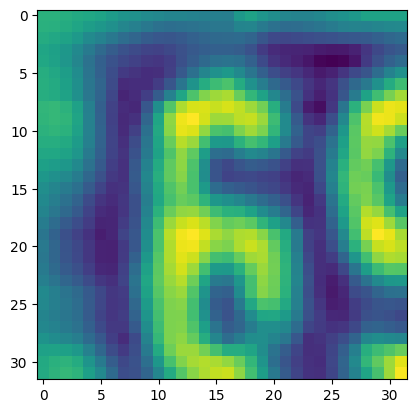

6


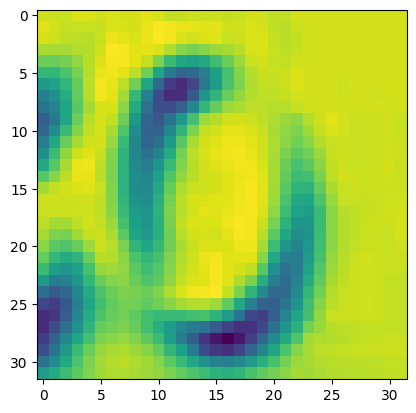

0


In [ ]:
from random import randint
for i in range(10):
  a = randint(0,24000)
  plt.imshow(X_train[a])
  plt.show()
  print(y_train[a])

## Reshaping Data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

## Normalising the pixel value

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## One Hot Encoding

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model Building

### **Model 1**

In [ ]:
model1 = Sequential()

model1.add(Dense(256, activation='relu', input_shape=(1024,)))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
# model1.add(Dense(128, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax')) # Output layer (10 classes)

In [ ]:
opt1 = optimizers.Adam(learning_rate = 5e-5)
model1.compile(optimizer = opt1, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296,586 (1.13 MB)

 Trainable params: 296,586 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train.shape

(29400, 10)

#### **Model Training**

In [ ]:
model1_log = model1.fit(X_train, y_train, batch_size = 5000, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 898ms/step - accuracy: 0.1007 - loss: 2.5944 - val_accuracy: 0.1086 - val_loss: 2.3181
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.1025 - loss: 2.4801 - val_accuracy: 0.1109 - val_loss: 2.3031
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.1015 - loss: 2.4168 - val_accuracy: 0.1179 - val_loss: 2.3002
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.1040 - loss: 2.3748 - val_accuracy: 0.1137 - val_loss: 2.2995
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.1022 - loss: 2.3530 - val_accuracy: 0.1176 - val_loss: 2.2987
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.1013 - loss: 2.3411 - val_accuracy: 0.1196 - val_loss: 2.2980
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.0995 - loss: 2.3352 - val_accuracy: 0.1277 - val_loss: 2.2972
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.1064 - loss: 2.3226 - val_accuracy: 0.1344 - val_loss:

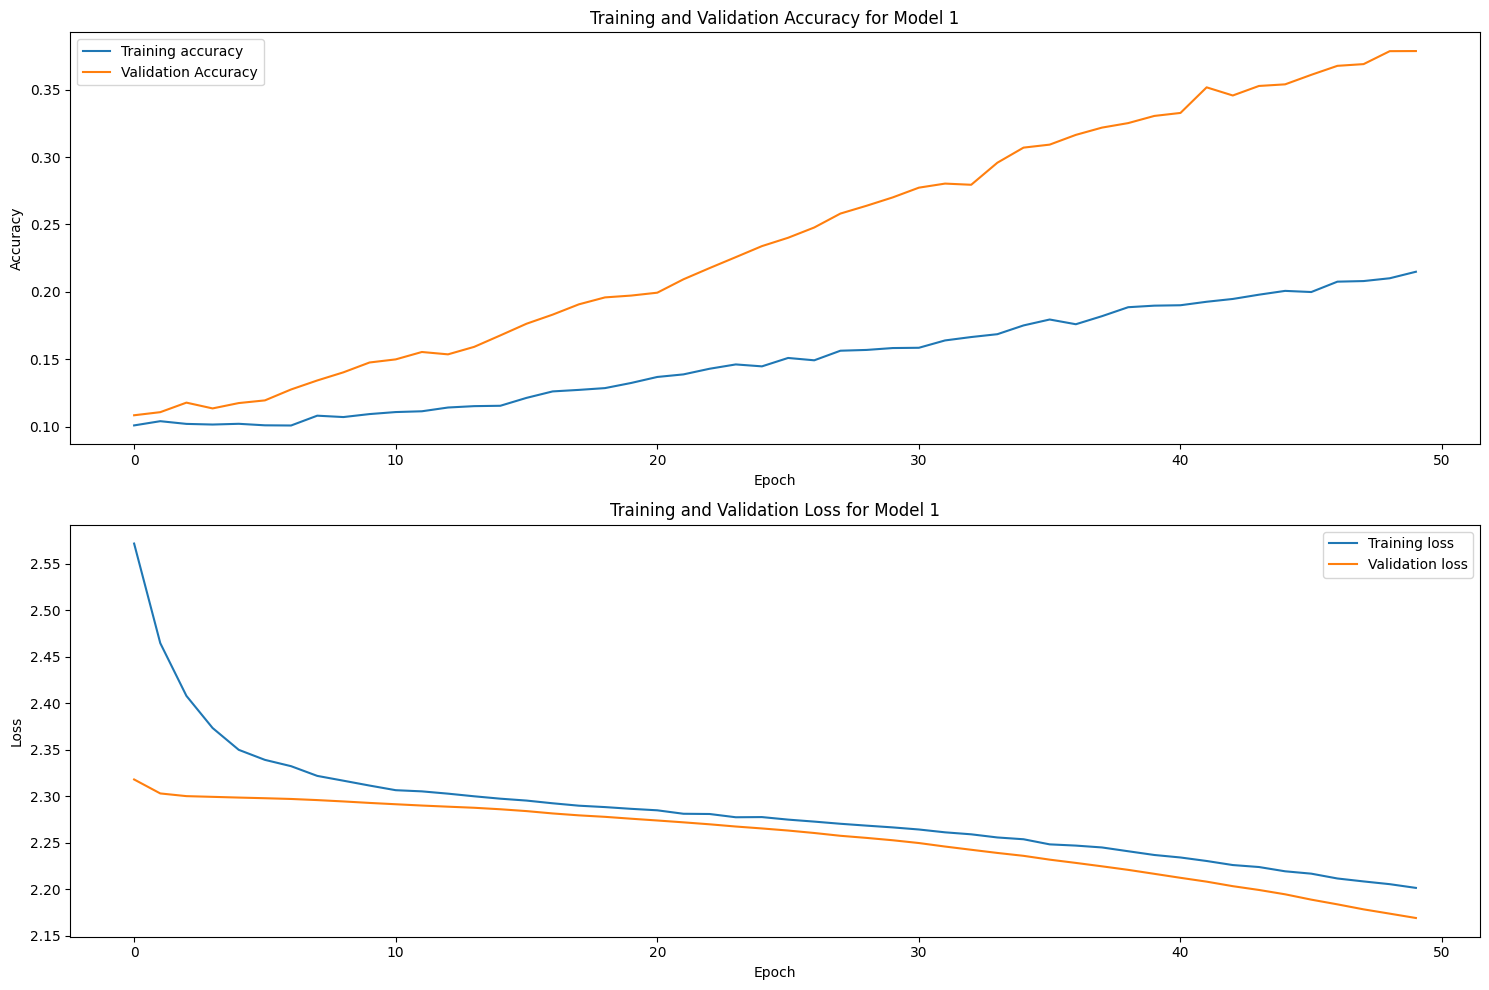

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

sns.lineplot(model1_log.history['accuracy'], label='Training accuracy', ax=axes[0])
sns.lineplot(model1_log.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])
axes[0].set_title('Training and Validation Accuracy for Model 1')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

sns.lineplot(model1_log.history['loss'], label='Training loss', ax=axes[1])
sns.lineplot(model1_log.history['val_loss'], label='Validation loss', ax=axes[1])
axes[1].set_title('Training and Validation Loss for Model 1')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

### **Model 2**

Added Batch Normalization to each layer

In [ ]:
model2 = Sequential()

model2.add(Dense(256, activation='relu', input_shape=(1024,), kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax')) # Output layer (10 classes)

In [ ]:
opt2 = optimizers.Adam(learning_rate = 5e-4)
model2.compile(optimizer = opt2, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,122 (1.14 MB)

 Trainable params: 297,354 (1.13 MB)

 Non-trainable params: 768 (3.00 KB)

#### **Model Training**

In [ ]:
model2_log = model2.fit(X_train, y_train, batch_size = 5000, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.1043 - loss: 5.0216 - val_accuracy: 0.1042 - val_loss: 4.3706
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.1254 - loss: 4.7287 - val_accuracy: 0.1188 - val_loss: 4.2725
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - accuracy: 0.1456 - loss: 4.5067 - val_accuracy: 0.1138 - val_loss: 4.1884
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.1785 - loss: 4.2840 - val_accuracy: 0.1493 - val_loss: 4.0960
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.2066 - loss: 4.0854 - val_accuracy: 0.1814 - val_loss: 3.9992
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.2389 - loss: 3.8998 - val_accuracy: 0.2321 - val_loss: 3.9032
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.2730 - loss: 3.7310 - val_accuracy: 0.3145 - val_loss: 3.8137
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - accuracy: 0.3060 - loss: 3.5681 - val_accuracy: 0.3133 - val_loss:

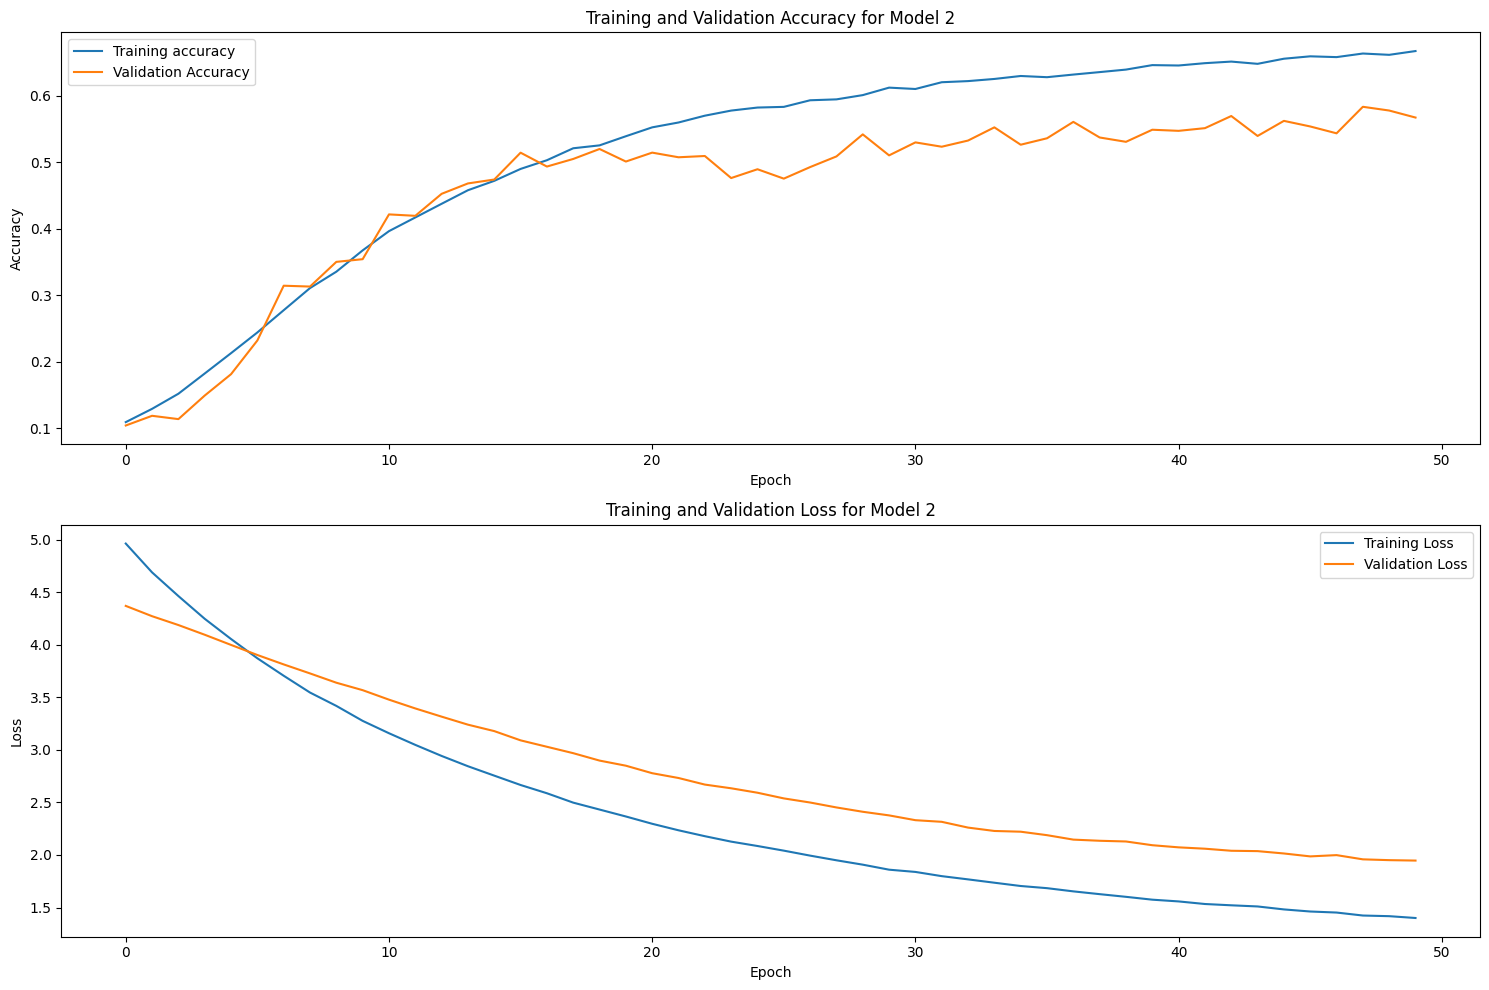

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

sns.lineplot(model2_log.history['accuracy'], label='Training accuracy', ax=axes[0])
sns.lineplot(model2_log.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])
axes[0].set_title('Training and Validation Accuracy for Model 2')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

sns.lineplot(model2_log.history['loss'], label='Training Loss', ax=axes[1])
sns.lineplot(model2_log.history['val_loss'], label='Validation Loss', ax=axes[1])
axes[1].set_title('Training and Validation Loss for Model 2')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

## Observations

* Model 2 includes L2 regularization in both dense layers, while Model 1 does not have any regularization.

* Model 2 has batch normalization layers after each dense layer, but Model 1 does not use batch normalization.

* Model 2 applies L2 regularization to improve the regularization.

* Both models use dropout with the same values of 0.5 and 0.2 to reduce overfitting, however adding L2 regularization improves the performance of model 2

* Model 1 tends to memorise the pattern however model 2 is learning the pattern. Also higher validation accuracy and lower validation loss in terms of model 1, indicates that there are dupicates in the data.